# Problem Statement: Predict the fare amount of future rides using regression analysis

The rise of ride services like Uber has created a vast amount of trip-related data that can be leveraged to optimize business operations and enhance customer experience. One of the critical challenges for Uber is predicting the fare amount for future rides based on historical trip data. Accurate fare predictions are essential for improving user satisfaction, managing demand-supply balance, and building trust by providing upfront fare estimates.

In this project, the goal is to develop a regression-based machine learning model that predicts the fare amount for future rides. The model should take into account various factors influencing the fare, such as:

1. Trip Information: Pickup and drop-off locations, distance traveled, and trip duration.
2. Time and Date: Hour of the day, day of the week, holidays, and weather conditions.
3. External Factors: Surge pricing and traffic conditions.

#### Key Objectives:

- Preprocess and clean the dataset to handle missing values, outliers, and inconsistencies.
- Conduct exploratory data analysis (EDA) to identify trends and relationships within the data.
- Build and evaluate regression models (e.g., Linear Regression,Ridge regression, lasso regression, polynomial regression, Random Forest, XGBoost) to predict fare amounts.
- Interpret the model results to provide actionable insights for improving fare prediction accuracy.

#### success Metrics:

- Achieve high Model performance measured through metrics like R-squared, Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE)
- Ensure that the model provides accurate predictions within a reasonable range of error for unseen data.

#### Outcome:

This project aims to create a robust fare prediction model that can assist Uber in providing upfront pricing for its customers, optimizing driver allocations, and improving operational efficiency.

In [1]:
## Import necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


### Loading The Dataset

In [2]:
df = pd.read_csv('uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
## iformation of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [4]:
## Checking shape of the dataset
df.shape

(200000, 9)

In [5]:
## checking the columns (Also its important to watch for any spelling errors)
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

#### Missing Value Treatment

In [6]:
# First lets drop the duplicates if any
df.drop_duplicates(inplace=True)

In [7]:
## Checing the missing values
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [8]:
## Lets see the collumns with the missing values
df[df.isnull().any(axis=1)]

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
87946,32736015,2013-07-02 03:51:57.0000001,24.1,2013-07-02 03:51:57 UTC,-73.950581,40.779692,NaN,NaN,0


In [9]:
## Dropping this column will have no harm to the dataset
df.dropna(axis=0, inplace=True)

In [10]:
## Checking for missing values
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

#### Feature Engineering

In [11]:
## derive features like time of day (morning, afternoon, evening)

# Ensure 'pickup_datetime' is in datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Extract hour and create time categories
def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to create a new column
df['time_of_day'] = df['pickup_datetime'].dt.hour.apply(time_of_day)

# Check the new column
print(df[['pickup_datetime', 'time_of_day']].head())

            pickup_datetime time_of_day
0 2015-05-07 19:52:06+00:00     Evening
1 2009-07-17 20:04:56+00:00     Evening
2 2009-08-24 21:45:00+00:00       Night
3 2009-06-26 08:22:21+00:00     Morning
4 2014-08-28 17:47:00+00:00     Evening


In [12]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,time_of_day
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,Evening
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,Evening
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,Night
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,Morning
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,Evening


In [13]:
df[df['pickup_latitude']==0]

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,time_of_day
7,44195482,2012-12-11 13:52:00.00000029,2.5,2012-12-11 13:52:00+00:00,0.0,0.0,0.0,0.0,1,Afternoon
11,6379048,2011-05-23 22:15:00.00000086,8.5,2011-05-23 22:15:00+00:00,0.0,0.0,0.0,0.0,1,Night
65,21993993,2014-05-05 19:27:00.00000034,6.0,2014-05-05 19:27:00+00:00,0.0,0.0,0.0,0.0,1,Evening
92,1454546,2011-12-02 14:07:00.000000207,6.1,2011-12-02 14:07:00+00:00,0.0,0.0,0.0,0.0,1,Afternoon
120,17358122,2010-08-20 19:39:48.0000003,6.5,2010-08-20 19:39:48+00:00,0.0,0.0,0.0,0.0,1,Evening
...,...,...,...,...,...,...,...,...,...,...
199718,49162936,2011-08-19 07:16:00.00000037,4.9,2011-08-19 07:16:00+00:00,0.0,0.0,0.0,0.0,1,Morning
199724,46007628,2013-10-11 11:25:41.0000004,7.5,2013-10-11 11:25:41+00:00,0.0,0.0,0.0,0.0,1,Morning
199880,35013970,2014-02-22 06:45:46.0000002,6.5,2014-02-22 06:45:46+00:00,0.0,0.0,0.0,0.0,1,Morning
199883,44115598,2012-09-10 17:39:00.00000090,12.5,2012-09-10 17:39:00+00:00,0.0,0.0,0.0,0.0,2,Evening


In [14]:
## since there are 0 as placeholders for the missing values,  to fix it lets just filter out the data.
df = df[(df.pickup_latitude < 90) & (df.dropoff_latitude < 90) & ## since latitude must be in the range (-90, 90) & (-180, 180)
        (df.pickup_latitude > -90) & (df.dropoff_latitude > -90) & 
        (df.pickup_longitude < 180) & (df.dropoff_longitude < 180) & 
        (df.pickup_longitude > -180) & (df.dropoff_longitude > -180) & 
        (df.pickup_latitude != 0) & (df.pickup_longitude != 0) & 
        (df.dropoff_latitude != 0) & (df.dropoff_longitude != 0)]

df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,time_of_day
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,Evening
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,Evening
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,Night
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,Morning
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,Evening
...,...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,Morning
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,Night
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,Night
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,Afternoon


In [15]:
df[df['pickup_latitude']==0]

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,time_of_day


In [16]:
## To calculate the actual driving distance from point A to point B we will be using geopy library 

from geopy.distance import distance

df['distance'] = df.apply(lambda x: round(
    distance((x['pickup_latitude'], x['pickup_longitude']),
             (x['dropoff_latitude'],x['dropoff_longitude'])).kilometers,2 ), axis=1)

In [17]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,time_of_day,distance
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,Evening,1.68
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,Evening,2.45
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,Night,5.04
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,Morning,1.66
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,Evening,4.48
...,...,...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,Morning,0.11
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,Night,1.88
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,Night,12.87
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,Afternoon,3.54


In [18]:
## dividing the sgements of pickup_datetime to year month weekday and hour.

import datetime

df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['pickup_month'] = df['pickup_datetime'].dt.month
df['pickup_year'] = df['pickup_datetime'].dt.year


df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,time_of_day,distance,pickup_hour,pickup_day_of_week,pickup_month,pickup_year
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,Evening,1.68,19,3,5,2015
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,Evening,2.45,20,4,7,2009
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,Night,5.04,21,0,8,2009
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,Morning,1.66,8,4,6,2009
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,Evening,4.48,17,3,8,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,Morning,0.11,10,6,10,2012
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,Night,1.88,1,4,3,2014
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,Night,12.87,0,0,6,2009
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,Afternoon,3.54,14,2,5,2015


In [19]:
# Dropping columns that have the least impact on our analysis

df.drop(['pickup_latitude', 'pickup_longitude', 
         'dropoff_latitude', 'dropoff_longitude', 'Unnamed: 0', 'key', 'pickup_datetime'], axis=1, inplace=True)

In [20]:
df.reset_index(drop=True, inplace=True)

In [21]:
df

,fare_amount,passenger_count,time_of_day,distance,pickup_hour,pickup_day_of_week,pickup_month,pickup_year
0,7.5,1,Evening,1.68,19,3,5,2015
1,7.7,1,Evening,2.45,20,4,7,2009
2,12.9,1,Night,5.04,21,0,8,2009
3,5.3,3,Morning,1.66,8,4,6,2009
4,16.0,5,Evening,4.48,17,3,8,2014
...,...,...,...,...,...,...,...,...
196014,3.0,1,Morning,0.11,10,6,10,2012
196015,7.5,1,Night,1.88,1,4,3,2014
196016,30.9,2,Night,12.87,0,0,6,2009
196017,14.5,1,Afternoon,3.54,14,2,5,2015


In [23]:
df.describe()

,fare_amount,passenger_count,distance,pickup_hour,pickup_day_of_week,pickup_month,pickup_year
count,196019.000000,196019.000000,196019.000000,196019.000000,196019.000000,196019.000000,196019.000000
mean,11.342965,1.685229,4.473617,13.490922,3.048577,6.282263,2011.739571
std,9.799677,1.388154,79.072008,6.514390,1.947009,3.439866,1.858917
min,-52.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2009.000000
25%,6.000000,1.000000,1.260000,9.000000,1.000000,3.000000,2010.000000
50%,8.500000,1.000000,2.160000,14.000000,3.000000,6.000000,2012.000000
75%,12.500000,2.000000,3.910000,19.000000,5.000000,9.000000,2013.000000
max,499.000000,208.000000,8668.030000,23.000000,6.000000,12.000000,2015.000000


In [24]:
df.describe(include=['O'])

,time_of_day
count,196019
unique,4
top,Night
freq,54935


# Summary Statistics

## Key Observations (Numerical Data):
1. **Fare Amount (fare_amount):**
   - The fare ranges from -52.00 (outlier) to 499.00, with an average fare of 11.34.
   - The majority of fares are between 6.00 and 12.50, as indicated by the interquartile range (IQR).
   - A negative fare value is present, suggesting data entry errors that need correction.

2. **Passenger Count (passenger_count):**
   - Passenger counts range from 0 (unusual data) to 208 (outlier), with an average of 1.68 passengers per ride.
   - Most rides have 1-2 passengers, indicating single or shared trips dominate the dataset.

3. **Distance (distance):**
   - Distances vary significantly, with a mean of 4.44 and a maximum of 8668.03 miles (extreme outlier).
   - Most trips cover short distances, with 75% of rides below 3.91 miles.

4. **Pickup Hour (pickup_hour):**
   - Ride pickups are distributed throughout the day, with an average pickup time around 1:30 PM.
   - Hourly data ranges from 0 (midnight) to 23 (11:00 PM), capturing the full day.

5. **Pickup Day of Week (pickup_day_of_week):**
   - Rides are evenly distributed across the week, with an average value of 3 (Wednesday).
   - This feature captures temporal patterns in ride demand.

6. **Pickup Year (pickup_year):**
   - Data spans from 2009 to 2015, with a mean year of 2011.
   - This indicates historical ride data used for predictive modeling.

---

## Key Observations (Categorical Data):
1. **Time of Day (time_of_day):**
   - The dataset categorizes time into Morning, Afternoon, Evening, and Night.
   - The most frequent time category is Night, representing high ride demand during late hours.

2. **Feature Importance:**
   - The most influential predictor is `distance`, followed by `pickup_year` and `time_of_day`.
   - Categorical time features like Night, Morning, and Afternoon contribute to the variability in fare prediction.

---

## Insights:
- **Outliers:** Negative fares and extreme distances highlight potential data quality issues that should be addressed for accurate modeling.
- **Feature Relevance:** Distance is the primary determinant of fare, emphasizing the need for accurate location data during prediction.


## Exploratory Data Analysis

### Univariate Analysis

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196019 entries, 0 to 196018
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   fare_amount         196019 non-null  float64
 1   passenger_count     196019 non-null  int64  
 2   time_of_day         196019 non-null  object 
 3   distance            196019 non-null  float64
 4   pickup_hour         196019 non-null  int32  
 5   pickup_day_of_week  196019 non-null  int32  
 6   pickup_month        196019 non-null  int32  
 7   pickup_year         196019 non-null  int32  
dtypes: float64(2), int32(4), int64(1), object(1)
memory usage: 9.0+ MB


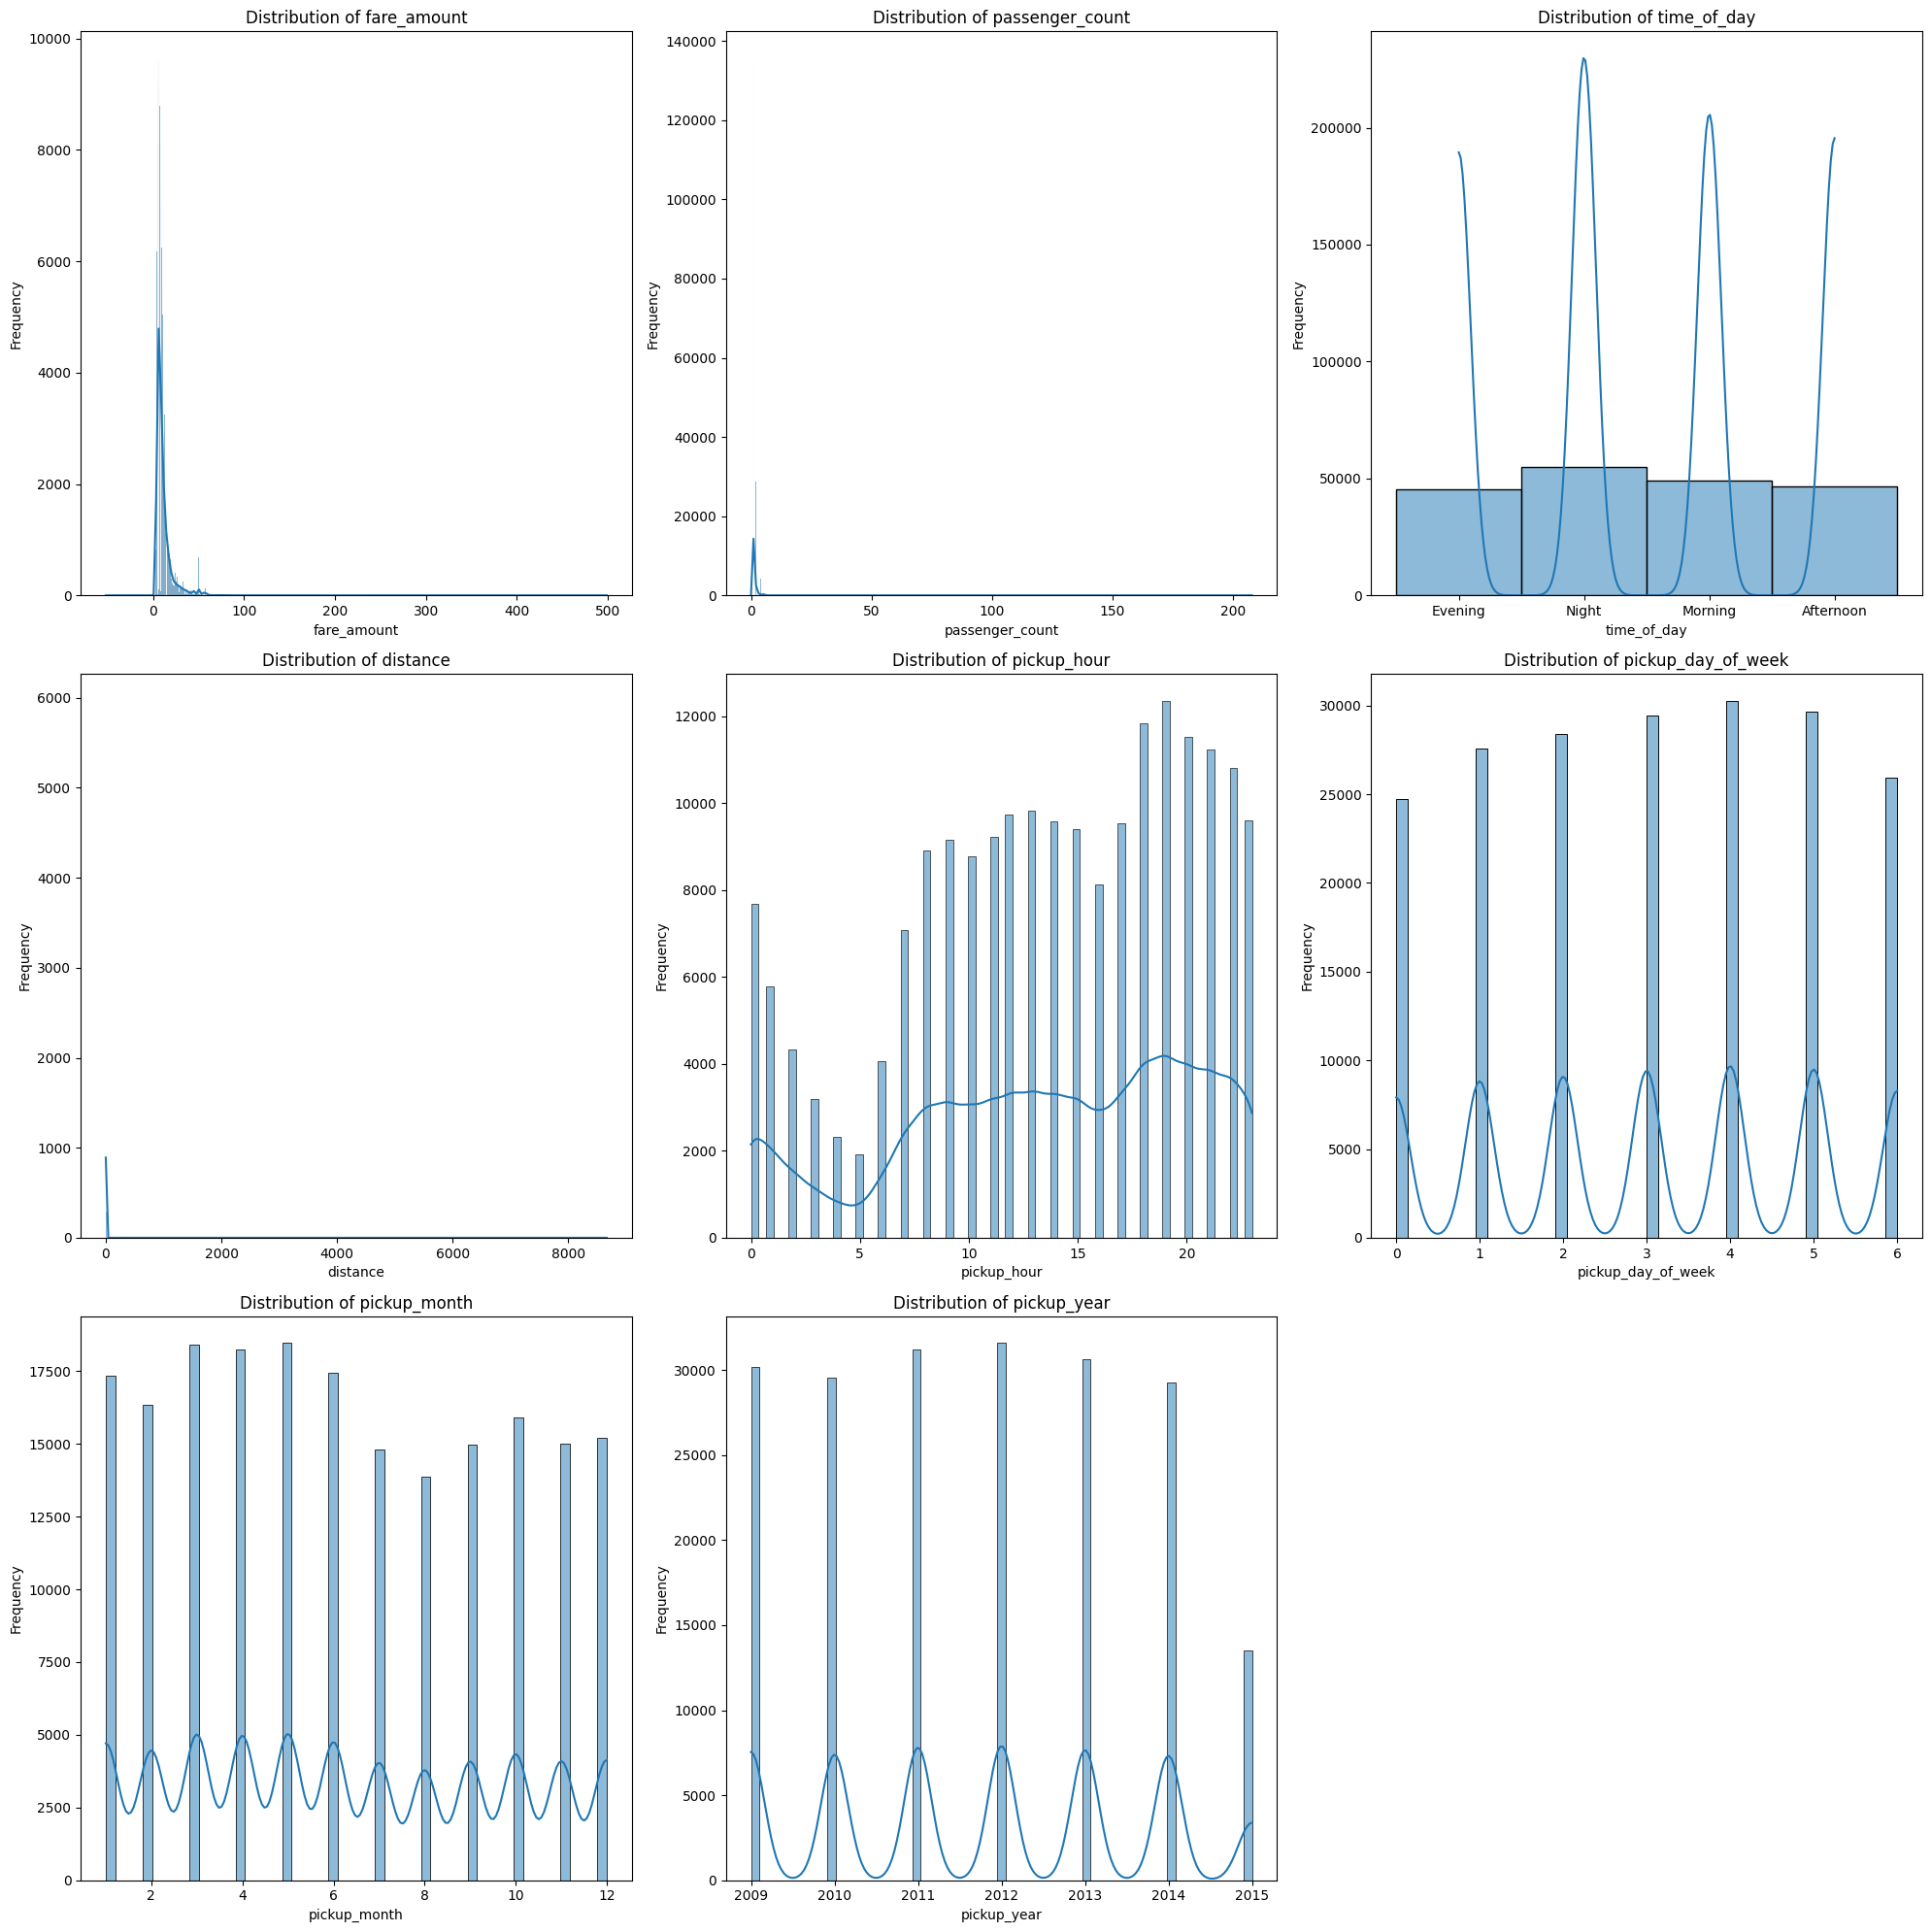

In [23]:
# Lets analyze the distribution of each of the features.
cols = df.columns

plt.figure(figsize=(20,20))
for i, col in enumerate(cols,1):
    plt.subplot(len(cols)//3+1,3,i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show() 

## Insights

- fare_amount: As we can see from the graph the fare amount is highly skewed to the right, with most fares concentrated at lower values. This suggest that either thaere are outliers or the distance traveled is too long.

- Passengers:Most have 1 passenger, with very few trips having 2-6 passengers. Also There are anomalies, with some trips showing over 100 passengers, which is not realistic.

- time_of_day: The distribution across different times of the day (Morning, Afternoon, Evening, Night) appears balanced.

- Distance: The distance distribution is highly skewed, with most trips covering short distances. A few trips show distances of over 8000 km, which is likely erroneous.

- Pickup_hour: The number of rides is uniformly distributed across different hours of the day.

- day_of_week: The distribution of rides is uniform across all days of the week.

- pickup_month: All months show similar distributions, indicating that rides occur consistently throughout the year.

- pickup_year: The dataset spans multiple years from 2009 to 2015, with consistent rides each year. The dip in 2015 may suggest incomplete data.

- pickup_day: The graphs is fairly distributed in all the days suggesting stablity and indicating steady demand of rides throughout the month.

## Outlier Analysis

As we know there are some features that are highly right skewed.

Features that are highly skewed are: 
- fare_amount, 
- distance, 
- passenger_count

<Axes: >

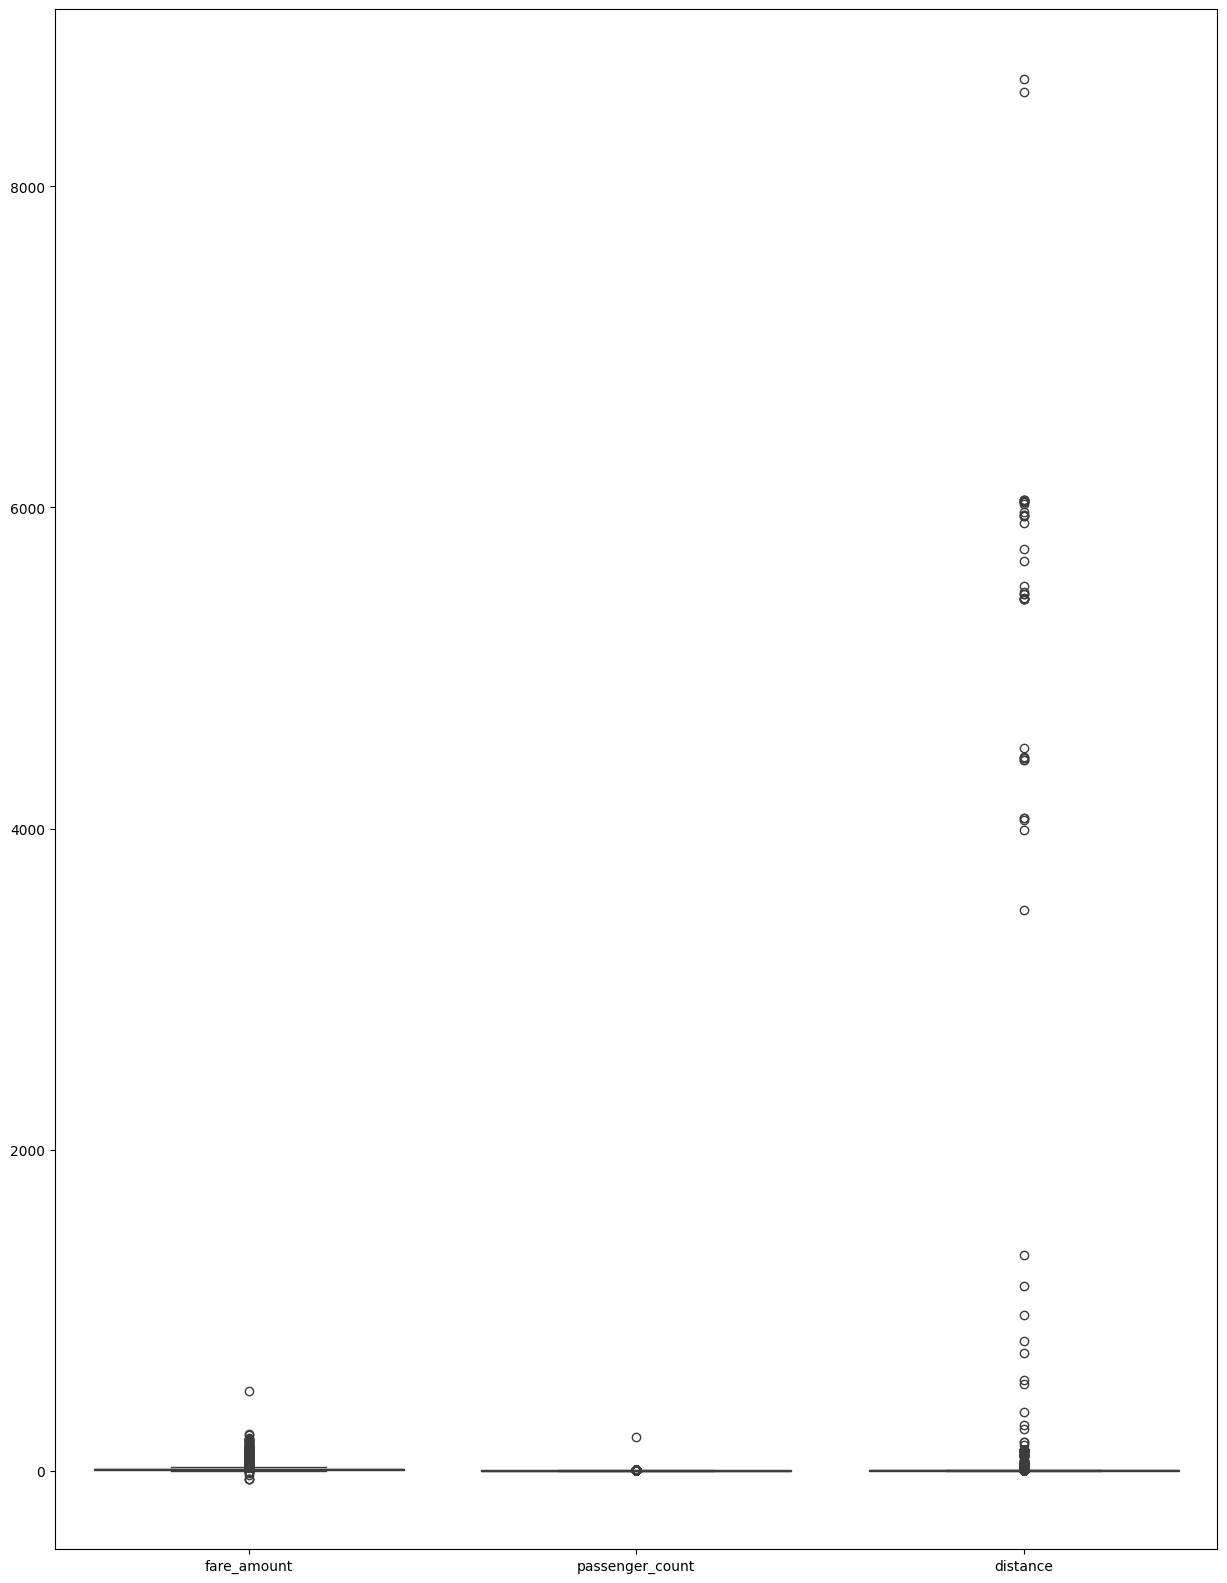

In [24]:
## Outlier Analysis with box plot:

fig, ax = plt.subplots(figsize=(15,20))
sns.boxplot(data= df[['fare_amount','passenger_count', 'distance']], ax = ax)

## Insights

As we can see there are extreme outliers in the datase, reasons for these anamoly:
- Data Entry errors.
- Unusual long_distance trips

Treating this outliers is a delicate matter:
> using IQR inter quantile range to detect outliers and remove them

In [25]:
# anaomaly detection in passenger count
df['passenger_count'].unique()

array([  1,   3,   5,   2,   4,   6,   0, 208])

In [26]:
# Filtering out the anomalies
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] <= 6)]

In [27]:
outlier_features = ['fare_amount', 'distance']

for i in outlier_features:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]



In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170719 entries, 0 to 196018
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   fare_amount         170719 non-null  float64
 1   passenger_count     170719 non-null  int64  
 2   time_of_day         170719 non-null  object 
 3   distance            170719 non-null  float64
 4   pickup_hour         170719 non-null  int32  
 5   pickup_day_of_week  170719 non-null  int32  
 6   pickup_month        170719 non-null  int32  
 7   pickup_year         170719 non-null  int32  
dtypes: float64(2), int32(4), int64(1), object(1)
memory usage: 9.1+ MB


<Axes: >

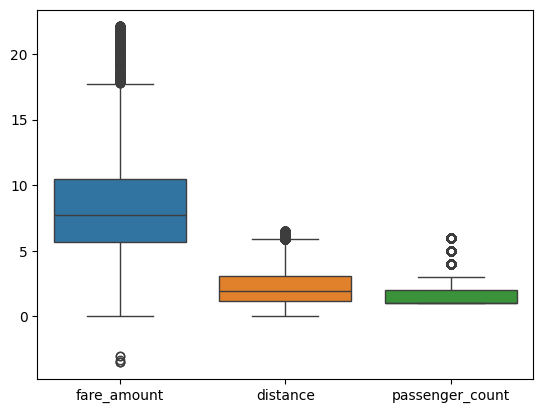

In [29]:
## Lets check wether we handles the outliers
sns.boxplot(data=df[['fare_amount','distance', 'passenger_count']])

In [30]:
# since there are still significant outliers in the dataset therefore we will drop these
outlier_features = ['fare_amount', 'distance']

for i in outlier_features:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]

<Axes: >

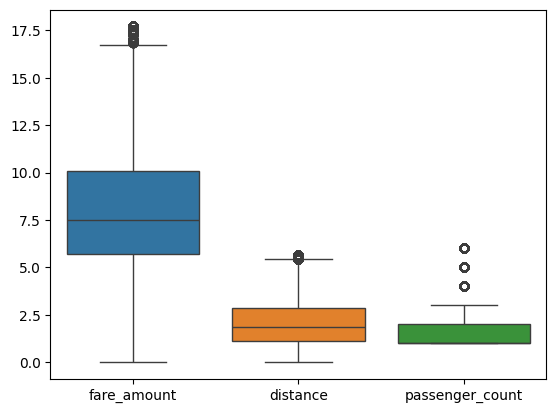

In [31]:
## Lets check wether we handles the outliers
sns.boxplot(data=df[['fare_amount','distance', 'passenger_count']])

In [32]:
df.describe()

,fare_amount,passenger_count,distance,pickup_hour,pickup_day_of_week,pickup_month,pickup_year
count,162695.000000,162695.000000,162695.000000,162695.000000,162695.000000,162695.000000,162695.000000
mean,8.126035,1.687114,2.110796,13.622226,3.035736,6.257930,2011.700206
std,3.201511,1.304688,1.263619,6.396090,1.940873,3.448254,1.859320
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2009.000000
25%,5.700000,1.000000,1.140000,9.000000,1.000000,3.000000,2010.000000
50%,7.500000,1.000000,1.840000,14.000000,3.000000,6.000000,2012.000000
75%,10.100000,2.000000,2.860000,19.000000,5.000000,9.000000,2013.000000
max,17.700000,6.000000,5.660000,23.000000,6.000000,12.000000,2015.000000


In [33]:
df.shape

(162695, 8)

## Outliers

The outliers are indeed in an acceptable range 


## Bivariate analysis



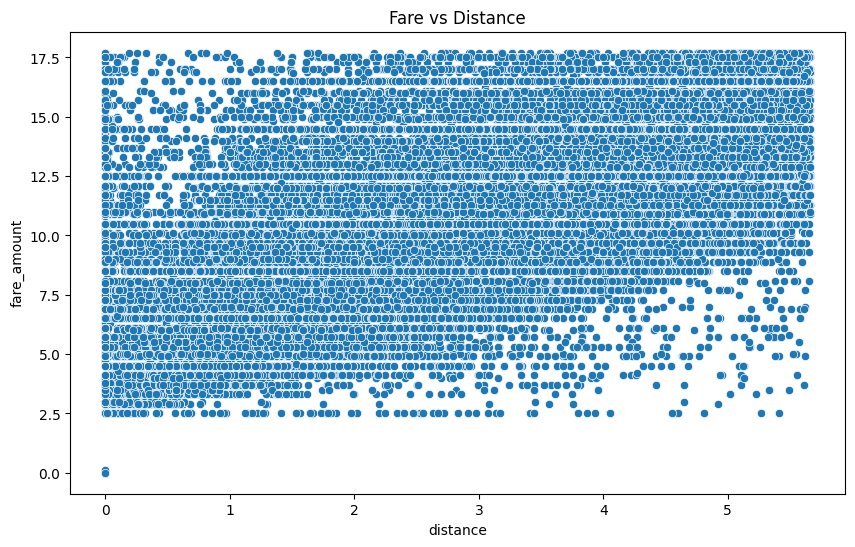

In [34]:
# Lets see the distribution of fare_amount feature and  against Distance feature

plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance', y='fare_amount', data=df)
plt.title('Fare vs Distance')
plt.show()

## Insights 

From the graphy we can observe there is a linear growth in fare_amount with respect to distanc. But as we can see there are many unusual fare_amount for 0 distance this may happen due to cancellation or pre paid system or something or it can be even an anamoly.

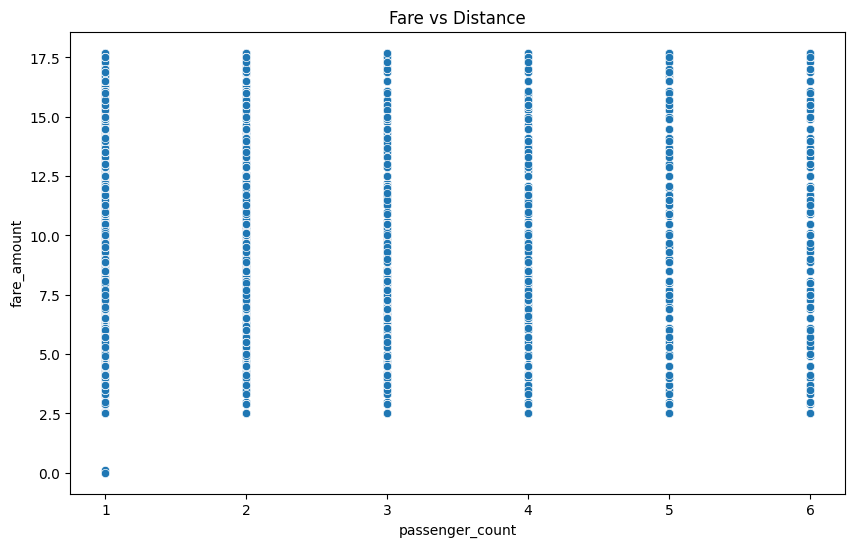

In [111]:
# Lets see the fare amount with respect to passengers

plt.figure(figsize=(10, 6))
sns.scatterplot(x='passenger_count', y='fare_amount', data=df)
plt.title('Fare vs Distance')
plt.show()

## Insights

passenger__count may not fairly influence the price of the fare.

In [112]:
df.head()

,fare_amount,passenger_count,time_of_day,distance,pickup_hour,pickup_day_of_week,pickup_month,pickup_year
0,7.5,1,Evening,1.68,19,3,5,2015
1,7.7,1,Evening,2.45,20,4,7,2009
2,12.9,1,Night,5.04,21,0,8,2009
3,5.3,3,Morning,1.66,8,4,6,2009
4,16.0,5,Evening,4.48,17,3,8,2014


<Axes: xlabel='fare_amount', ylabel='Count'>

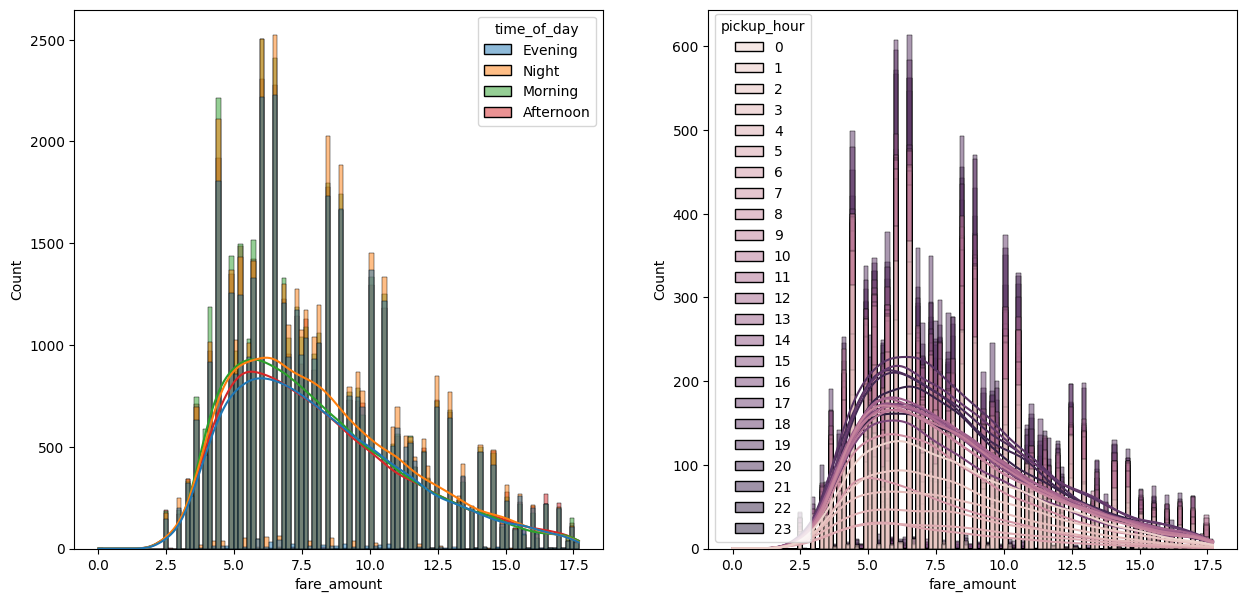

In [113]:
## Lets check the influence of time_of_day and pickup_hour on fare_price
fig, axs = plt.subplots(1,2, figsize =(15,7))
plt.subplot(121)
sns.histplot(data=df, x='fare_amount', kde= True, hue='time_of_day')
plt.subplot(122)
sns.histplot(data=df, x='fare_amount', kde= True, hue='pickup_hour')



## Insights


fare_amount vs time_of_day:

- Evening and Night: Higher fare amounts are slightly more frequent during the Evening and Night.
- Morning and Afternoon: Fares are more concentrated in the lower range during the Morning and Afternoon.

The most frequent fares are around $5 to $8. This is consistent across different times of the day.

fare_amount vs pickup_hour:

- A large concentration of fares occurs during peak hours (6 AM to 10 AM and 4 PM to 8 PM). This suggests rush hour demand drives most of the trips.



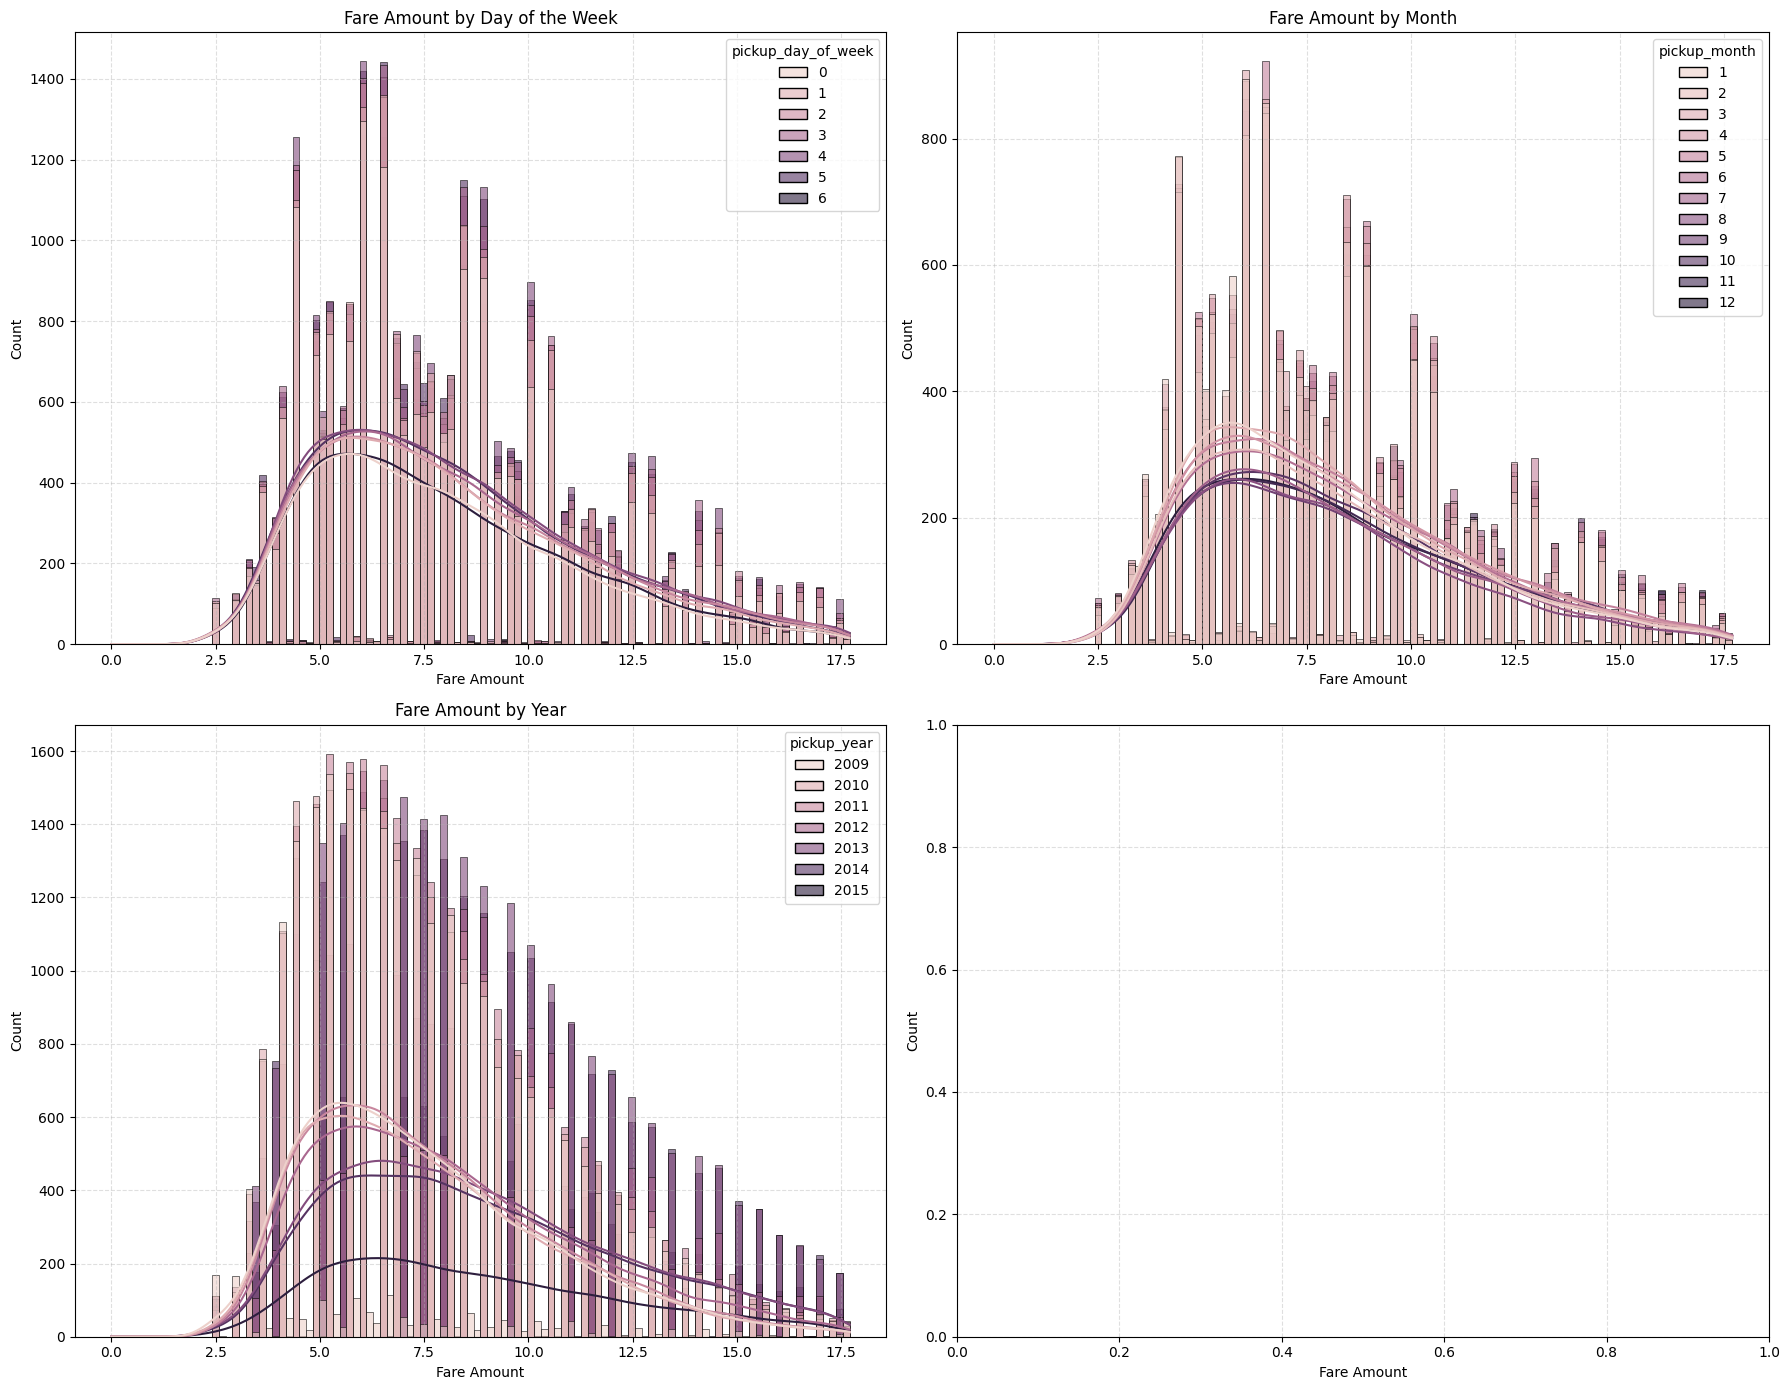

In [118]:
## Lets check the influence of pickup_day_of_week and pickup month and year on fare_price
fig, axs = plt.subplots(2, 2, figsize=(18, 14))  # Larger figure size

sns.histplot(data=df, x='fare_amount', kde=True, hue='pickup_day_of_week', ax=axs[0, 0], alpha=0.6)
axs[0, 0].set_title('Fare Amount by Day of the Week')

sns.histplot(data=df, x='fare_amount', kde=True, hue='pickup_month', ax=axs[0, 1], alpha=0.6)
axs[0, 1].set_title('Fare Amount by Month')

sns.histplot(data=df, x='fare_amount', kde=True, hue='pickup_year', ax=axs[1, 0], alpha=0.6)
axs[1, 0].set_title('Fare Amount by Year')

for ax in axs.flat:
    ax.grid(True, linestyle='--', alpha=0.4)  # Light gridlines
    ax.set_xlabel('Fare Amount')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


# Insights

Fare amount by Day of the Week:

- There are higher fare counts around mid-week, particularly Tuesday to Thursday.
- he fare distribution appears consistent across all days, but weekends may show slightly fewer rides.

Fare amount by Month:

- Spring and summer months (April to July) show a higher volume of rides
- The fare amount distribution is relatively stable across different months.

Fare Amount by Year:

- There is a gradual decrease in ride frequency over the years, but fare distribution remains similar.
- In later years (2014-2015), higher fare amounts seem more frequent compared to earlier years.

In [121]:
# Saving the data frame as cleaned_dataframe for model training

df.to_csv('Cleaned_dataset.csv', index=False)